In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
import os

os.environ["PATH"] = (
    r"C:\Graphviz\Graphviz-14.1.2-win64\bin"
    + os.pathsep
    + os.environ["PATH"]
)

from graphviz import Digraph


In [6]:
import shutil
print(shutil.which("dot"))


C:\Graphviz\Graphviz-14.1.2-win64\bin\dot.EXE


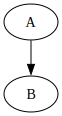

In [7]:
from graphviz import Digraph

dot = Digraph()
dot.edge("A", "B")
dot

- **Decision trees** are versatile machine learning algorithms that can perform
both **classification and regression** tasks, and even **multioutput** tasks. They are
powerful algorithms, capable of fitting complex datasets.
- **Decision trees** are also the fundamental components of **random forests**, which are among the most powerful machine learning algorithms
available today

# Training and Visualizing a Decision Tree

* Decision Trees are easier to understand by **building and inspecting one directly**
* A `DecisionTreeClassifier` is trained using the **Iris dataset**
* After training, the structure of the decision tree can be **visualized**
* `export_graphviz()` is used to **export the trained tree** into a `.dot` file (e.g., `iris_tree.dot`)
* The `.dot` file contains a **graph definition** describing nodes, splits, and decisions
* `graphviz.Source.from_file()` can be used to **load and display the tree directly inside a Jupyter notebook**
* Graphviz is an **open-source graph visualization tool**
* Graphviz provides a **command-line `dot` utility**
* The `dot` tool can convert `.dot` files into formats like **PDF** or **PNG**
* Visualization helps in understanding **how the decision tree makes predictions**


In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [8]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "iris_tree.dot"),  # path differs in the book
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

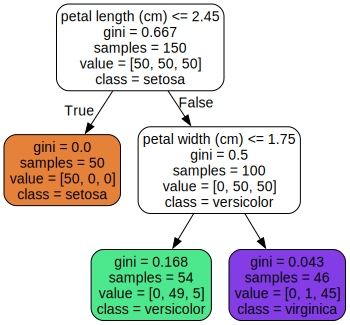

In [9]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "iris_tree.dot")  # path differs in the book

In [10]:
# extra code
!dot -Tpng {IMAGES_PATH / "iris_tree.dot"} -o {IMAGES_PATH / "iris_tree.png"}

# Making Predictions

>One of the many qualities of decision trees is that they require very little data preparation.
In fact, they don’t require feature scaling or centering at all.

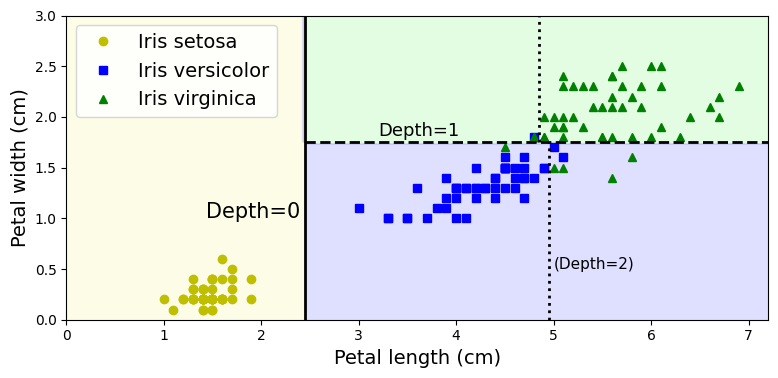

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# extra code – just formatting details
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

# extra code – this section beautifies and saves Figure 6–2
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()
save_fig("decision_tree_decision_boundaries_plot")

plt.show()

* Decision tree predictions start at the **root node (depth 0)** and follow a **question-based path**

* Each internal node asks a **binary question** about a feature

* Each leaf node gives a **final predicted class** without further questions

* For Iris classification using petals:

  * Root node checks: **petal length < 2.45 cm**
  * If **true** → move to **left child (depth 1, left)**

    * This node is a **leaf node**
    * Prediction: **Iris setosa**
  * If **false** → move to **right child (depth 1, right)**

* The depth-1 right node is a **split node**

  * It checks: **petal width < 1.75 cm**
  * If **true** → move to **depth 2, left**

    * Prediction: **Iris versicolor**
  * If **false** → move to **depth 2, right**

    * Prediction: **Iris virginica**

* A decision tree predicts by **following feature-based rules from root to leaf**

* The process is deterministic and easy to interpret

* Each node contains a **samples** attribute

  * It counts how many **training instances reach that node**
  * Example:

    * 100 samples have petal length > 2.45 cm (depth 1, right)
    * Out of these 100:

      * 54 have petal width < 1.75 cm (depth 2, left)

* Each node also contains a **value** attribute

  * It shows how many training samples of **each class** are present
  * Example (bottom-right node):

    * Iris setosa = 0
    * Iris versicolor = 1
    * Iris virginica = 45

* The **gini** attribute measures **node impurity**

* A node is **pure** if all samples belong to the same class

  * Pure node → **gini = 0**
  * Example:

    * Depth-1 left node contains only Iris setosa → gini = 0

* Gini impurity measures how mixed the classes are in a node

* Gini impurity formula:

 $$ ( G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2 )$$

* Where:

  * $( G_i )$ = Gini impurity of node ( i )
  * $( p_{i,k} )$ = proportion of class ( k ) samples in node ( i )
  * ( n ) = number of classes

* Example Gini calculation for depth-2 left node:

  * Class distribution: 0 setosa, 49 versicolor, 5 virginica
  * Total samples = 54
  * Gini:

  $$( G = 1 - (0/54)^2 - (49/54)^2 - (5/54)^2 \approx 0.168 )$$

* Decision boundaries visualize how the tree splits feature space

* Root node creates a **vertical boundary** at:

  * **petal length = 2.45 cm**

* Left region is pure → no further splits

* Right region is impure → split at:

  * **petal width = 1.75 cm**

* Because `max_depth = 2`:

  * The tree stops splitting at depth 2

* If `max_depth = 3`:

  * Each depth-2 node would create **additional decision boundaries**
  * These would appear as **vertical dotted lines** in the feature space

This section shows why decision trees are **transparent, interpretable, and easy to reason about** during prediction and visualization.


> Scikit-Learn uses the CART algorithm, which produces only binary trees, meaning trees
where split nodes always have exactly two children (i.e., questions only have yes/no
answers). However, other algorithms, such as ID3, can produce decision trees with nodes
that have more than two children.

In [13]:
tree_clf.tree_ #You can access the tree structure via the tree_ attribute:

## MODEL INTERPRETATION: WHITE BOX VERSUS BLACKBOX

* Decision trees are **intuitive** and their decision-making process is **easy to interpret**

* Models whose internal logic can be clearly understood are called **white box models**

* Decision trees provide **simple, human-readable rules**

* These rules can even be **applied manually** (e.g., classifying flowers)

* Random forests and neural networks are generally considered **black box models**

* Black box models often give **highly accurate predictions**

* However, it is usually **difficult to explain** why a specific prediction was made

* Example: in neural networks, it is unclear **which features** (eyes, mouth, background, etc.) influenced the prediction

* **Interpretability** is important in real-world applications

* The field of **interpretable machine learning** focuses on making models that can **explain their decisions**

* This is crucial to **build trust** and **avoid unfair or biased decisions**


# Estimating Class Probabilities

* A decision tree can estimate **class probabilities**, not just predict a class

* The tree first **traverses from root to a leaf node** based on feature values

* At the leaf node, the probability for class ( k ) is computed as:

  $$( P(\text{class } k) = \frac{\text{number of training instances of class } k \text{ in the leaf}}{\text{total training instances in the leaf}} )$$

* Example input:

  * Petal length = 5 cm
  * Petal width = 1.5 cm

* This instance reaches the **depth-2 left leaf node**

* Class probabilities at this leaf:

  * Iris setosa: ( 0/54 = 0% )
  * Iris versicolor: ( 49/54 $\approx$ 90.7% )
  * Iris virginica: ( 5/54 $\approx$ 9.3% )

* The predicted class is the one with the **highest probability**

  * Prediction: **Iris versicolor (class 1)**

* `predict_proba()` returns the probability distribution over classes

* `predict()` returns the class with the maximum probability

* The predicted probabilities are **constant within a leaf region**

* Any point inside the same decision boundary rectangle gets **identical probabilities**

* This can lead to **counterintuitive results**

  * Example: petals = 6 cm long and 1.5 cm wide still yield the same probabilities

* This happens because decision trees produce **piecewise-constant probability estimates**


In [14]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [15]:
 tree_clf.predict([[6, 1.5]])

array([1])

# The CART Training Algorithm

>As you can see, the CART algorithm is a greedy algorithm: it greedily searches for an
optimum split at the top level, then repeats the process at each subsequent level. It does
not check whether or not the split will lead to the lowest possible impurity several levels
down. A greedy algorithm often produces a solution that’s reasonably good but not
guaranteed to be optimal.
1
Unfortunately, finding the optimal tree is known to be an NP-complete problem.⁠ It
requires O(exp(m)) time, making the problem intractable even for small training sets. This
is why we must settle for a “reasonably good” solution when training decision trees.


* Scikit-Learn trains decision trees using the **CART (Classification and Regression Tree)** algorithm

* Training a decision tree is also called **growing the tree**

* CART works by **splitting the training data into two subsets**

* Each split is defined by:

  * A **feature** ( k )
  * A **threshold** ( t_k )

* Example split rule:

  * **petal length ≤ 2.45 cm**

* The algorithm searches for the **best pair ((k, t_k))**

* “Best” means the split that produces the **purest subsets**

* Purity is **weighted by the number of samples** in each subset

* CART minimizes the following cost function:

  $$( J(k, t_k) = \frac{m_{\text{left}}}{m} , G_{\text{left}} + \frac{m_{\text{right}}}{m} , G_{\text{right}} )$$

* Where:

  * $( G_{\text{left}}, G_{\text{right}} ) = impurity (e.g., Gini) of left/right subsets$
  * $( m_{\text{left}}, m_{\text{right}} ) = number of samples in left/right subsets$
  * ( m ) = total number of samples

* After the first split, CART **recursively applies the same process**

* It splits:

  * The subsets
  * Then sub-subsets
  * And so on

* The recursion stops when:

  * The **maximum depth** is reached (`max_depth`)
  * Or no split can **reduce impurity further**

* Additional hyperparameters that control stopping:

  * `min_samples_split`
  * `min_samples_leaf`
  * `min_weight_fraction_leaf`
  * `max_leaf_nodes`

* These hyperparameters help **prevent overfitting** and control tree complexity


# Computational Complexity

* Making a prediction requires **traversing the tree from the root to a leaf**

* At each node, the model checks **one feature value**

* Decision trees are usually **approximately balanced**

* For a training set with ( m ) samples:

  * Tree depth is roughly ( $\log_2(m)$ )

* Prediction requires visiting about ( $\log_2(m)$ ) nodes

* Time complexity of prediction:

  $( O(\log(m)) )$

* Prediction complexity is:

  * **Independent of the number of features**
  * **Very fast**, even for large datasets

* During training, the algorithm:

  * Compares **all features** (or fewer if `max_features` is set)
  * Evaluates them on **all samples** at each node

* Training time complexity:

  $( O(n \times m \log(m)) )$

* Where:

  * ( n ) = number of features
  * ( m ) = number of training samples


# Gini Impurity or Entropy?

* By default, `DecisionTreeClassifier` uses **Gini impurity** as the split criterion

* You can use **entropy** instead by setting:

  * `criterion = "entropy"`

* Entropy originated in **thermodynamics**

  * Measures **disorder**
  * Entropy → 0 when the system is **perfectly ordered**

* Entropy was later used in **Shannon’s information theory**

  * Measures the **average information content** of a message
  * Entropy = 0 when all messages are **identical**

* In machine learning, entropy is used as an **impurity measure**

* A node’s entropy is:

  * **0** if it contains instances of **only one class**
  * Higher when classes are more **mixed**

* Entropy formula for node ( i ):

  $$( H_i = - \sum_{k=1}^{n} p_{i,k} \log_2(p_{i,k}) \quad \text{for } p_{i,k} \neq 0 )$$

* Where:

  * ( $H_i$ ) = entropy of node ( i )
  * ( $p_{i,k}$) = proportion of class ( k ) instances in node ( i )
  * ( n ) = number of classes

* Example (depth-2 left node):

  * Class distribution: 49 versicolor, 5 virginica (out of 54)
  * Entropy:

  $$( H = -\frac{49}{54}\log_2\left(\frac{49}{54}\right) - \frac{5}{54}\log_2\left(\frac{5}{54}\right) \approx 0.445 )$$

* In practice, **Gini impurity and entropy usually produce very similar trees**

* Gini impurity is:

  * **Slightly faster** to compute
  * A good **default choice**

* When they differ:

  * **Gini impurity** tends to isolate the **most frequent class** early
  * **Entropy** tends to produce **more balanced trees**


# Regularization Hyperparameters

* Decision trees make **very few assumptions** about the training data

* Unlike linear models, they **do not assume linearity**

* If unconstrained, a decision tree can:

  * Adapt very closely to the training data
  * **Overfit** easily

* Decision trees are **nonparametric models**

  * Not because they have no parameters
  * But because the **number of parameters is not fixed before training**
  * The model structure is free to grow with the data

* Parametric models (e.g., linear models):

  * Have a **fixed number of parameters**
  * Lower risk of overfitting
  * Higher risk of **underfitting**

* To prevent overfitting, the tree’s flexibility must be **restricted**

* This restriction is called **regularization**

* The most common regularization method:

  * Limit the **maximum depth** of the tree

* In Scikit-Learn:

  * `max_depth = None` → unlimited depth (default)
  * Reducing `max_depth` → **stronger regularization**

* Other hyperparameters that control tree complexity:

  * `max_features` – max number of features evaluated at each split
  * `max_leaf_nodes` – maximum number of leaf nodes
  * `min_samples_split` – minimum samples required to split a node
  * `min_samples_leaf` – minimum samples required in a leaf node
  * `min_weight_fraction_leaf` – minimum weighted fraction of samples in a leaf

* Increasing `min_*` parameters **regularizes** the model

* Decreasing `max_*` parameters **regularizes** the model

* Regularization helps:

  * Reduce overfitting
  * Improve generalization

* Example experiment:

  * Train one tree **without regularization**
  * Train another tree with `min_samples_leaf = 5`

* Regularized trees produce **smoother, more general decision boundaries**


---

* Some algorithms train a **full decision tree first**, without any restrictions

* After training, they apply **pruning** to simplify the tree

* Pruning means **removing unnecessary nodes**

* A node is considered **unnecessary** if:

  * All of its children are **leaf nodes**
  * The improvement in purity is **not statistically significant**

* **Statistical hypothesis testing** is used to decide whether a node is useful

* Commonly used test:

  * **Chi-squared (χ²) test**

* The test evaluates the **null hypothesis**

  * The observed purity improvement happened **by chance**

* The result of the test is a **p-value**

* If:

  $$( \text{p-value} > \text{threshold (typically } 0.05) )$$

  * The split is considered **not significant**
  * The node is **pruned** (its children are deleted)

* Pruning is applied **recursively**

* The process continues until **all unnecessary nodes are removed**

* Pruning reduces **overfitting** and improves **generalization**


In [16]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

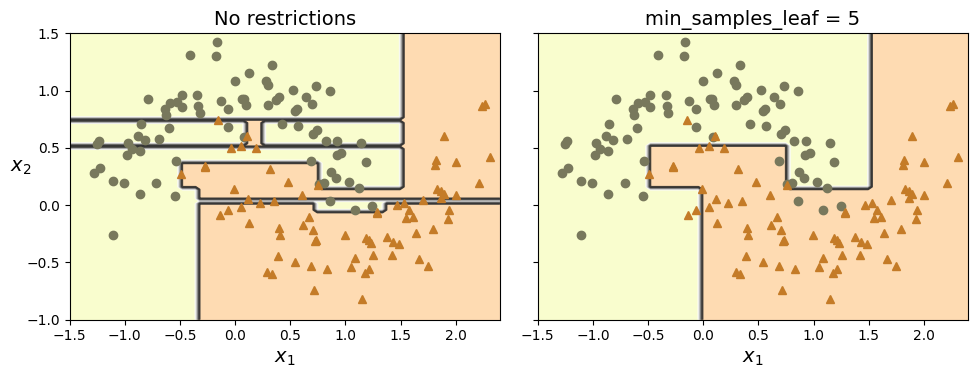

In [17]:
# extra code – this cell generates and saves Figure 6–3

def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
save_fig("min_samples_leaf_plot")
plt.show()

The unregularized model on the left is clearly overfitting, and the regularized
model on the right will probably generalize better. We can verify this by
evaluating both trees on a test set generated using a different random seed:

In [18]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2,
                                        random_state=43)
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [19]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

# Regression

>Decision trees are also capable of performing regression tasks. Let’s build a
regression tree using Scikit-Learn’s DecisionTreeRegressor class, training it
on a noisy quadratic dataset with max_depth=2:

In [20]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf

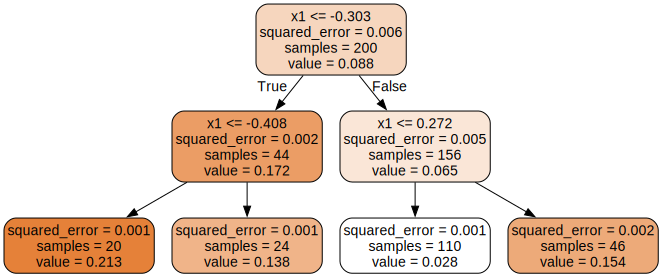

In [21]:
# extra code – we've already seen how to use export_graphviz()
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "regression_tree.dot")

* This is a **decision tree for regression**

* Structure is similar to a classification tree

* Key difference:

  * **Classification tree** predicts a **class**
  * **Regression tree** predicts a **numerical value**

* Each leaf node predicts a **value**

* The predicted value is the **average target value** of the training instances in that leaf

* Example prediction for a new instance with ( x = 0.2 ):

  * Root node checks: ( $x \le 0.197$ )
  * Condition is false → go to **right child**
  * Next node checks: ( $x \le 0.772$ )
  * Condition is true → go to **left child**
  * This node is a **leaf**
  * Predicted value: **0.111**

* The value **0.111** is:

  * The mean of the **110 training targets** in that leaf

* This leaf produces a **mean squared error (MSE)** of **0.015** over those 110 samples

* For regression trees:

  * Each region predicts a **constant value**
  * That value is always the **mean target value** of samples in the region

* Increasing `max_depth` (e.g., `max_depth = 3`):

  * Creates more regions
  * Produces more **step-like predictions**

* The algorithm splits regions to make:

  * Training points as **close as possible** to the predicted value

* CART for regression differs from classification:

  * Does **not minimize impurity**
  * Instead minimizes **Mean Squared Error (MSE)**

* CART regression cost function:

  $$( J(k, t_k) = \frac{m_{\text{left}}}{m} , \text{MSE}*{\text{left}} + \frac{m*{\text{right}}}{m} , \text{MSE}_{\text{right}} )$$

* Mean Squared Error for a node:

  $$( \text{MSE}*{\text{node}} = \frac{1}{m*{\text{node}}} \sum_{i \in \text{node}} \left( \hat{y}_{\text{node}} - y^{(i)} \right)^2 )$$

* Predicted value at a node:

  $$( \hat{y}*{\text{node}} = \frac{1}{m*{\text{node}}} \sum_{i \in \text{node}} y^{(i)} )$$

* Regression trees are **highly prone to overfitting**

* Without regularization:

  * Predictions can fit training data **too closely**

* Regularization improves regression trees:

  * Example: setting `min_samples_leaf = 10`
  * Produces **smoother, more realistic predictions**
  * Reduces overfitting and improves generalization


In [22]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf

In [23]:
tree_reg.tree_.threshold

array([-0.30265072, -0.40830374, -2.        , -2.        ,  0.27175756,
       -2.        , -2.        ])

In [24]:
tree_reg2.tree_.threshold

array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
       -0.37022041, -2.        , -2.        ,  0.27175756, -0.21270403,
       -2.        , -2.        ,  0.40399227, -2.        , -2.        ])

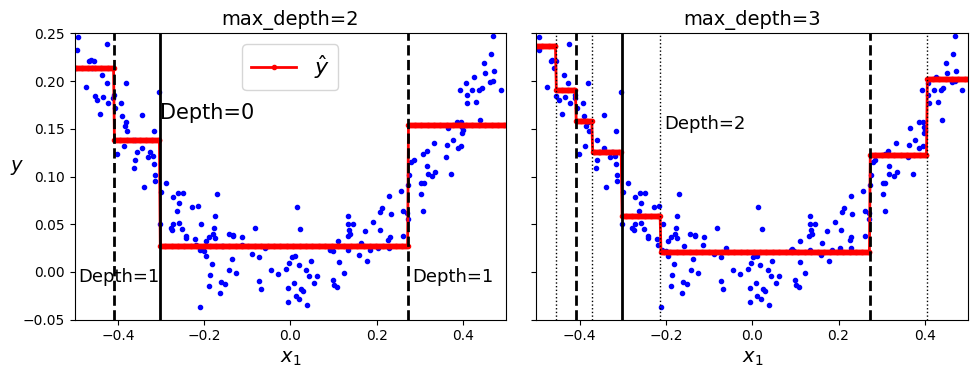

In [25]:
# extra code – this cell generates and saves Figure 6–5

def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")

save_fig("tree_regression_plot")
plt.show()

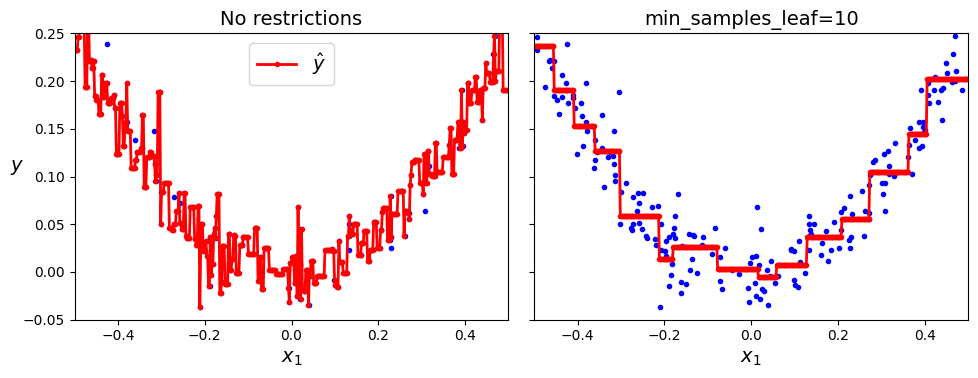

In [26]:
# extra code – this cell generates and saves Figure 6–6

tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")

save_fig("tree_regression_regularization_plot")
plt.show()

# Sensitivity to Axis Orientation

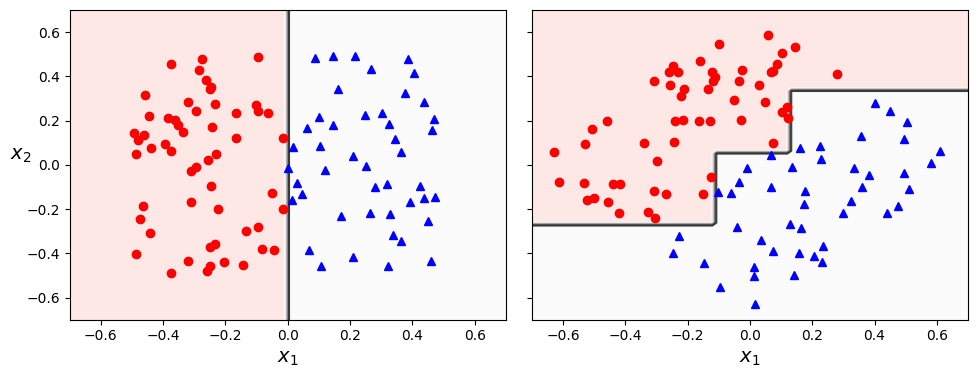

In [27]:
# extra code – this cell generates and saves Figure 6–7

np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

angle = np.pi / 4  # 45 degrees
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square = X_square.dot(rotation_matrix)

tree_clf_square = DecisionTreeClassifier(random_state=42)
tree_clf_square.fit(X_square, y_square)
tree_clf_rotated_square = DecisionTreeClassifier(random_state=42)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_square, X_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.sca(axes[1])
plot_decision_boundary(tree_clf_rotated_square, X_rotated_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()

* Decision trees have many strengths:

  * Easy to **understand and interpret**
  * **Simple to use**
  * **Versatile** (classification & regression)
  * **Powerful** models

* They also have important **limitations**

* Decision trees prefer **orthogonal decision boundaries**

  * All splits are **axis-aligned**
  * Boundaries are perpendicular to feature axes

* This makes decision trees **sensitive to data orientation**

* For linearly separable data:

  * Properly aligned data → **simple splits**
  * Rotated data (e.g., 45°) → **complex, convoluted boundaries**

* Even if both trees fit training data perfectly:

  * The rotated version is **less likely to generalize well**

* One way to reduce this issue:

  * **Scale the data**
  * Apply **Principal Component Analysis (PCA)**

* PCA:

  * **Rotates the feature space**
  * Reduces **correlation between features**
  * Often (but not always) makes splitting **easier for trees**

* A common solution is to build a **pipeline**:

  * Data scaling
  * PCA transformation
  * DecisionTreeClassifier

* After PCA:

  * The tree can sometimes fit the data using **fewer features**
  * Example: using a single feature ( $z_1$ )

* ( $z_1$ ) is a **linear combination** of original features

  * Derived from petal length and petal width

* Feature rotation can lead to:

  * **Simpler decision boundaries**
  * **Better generalization** in some cases


In [28]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

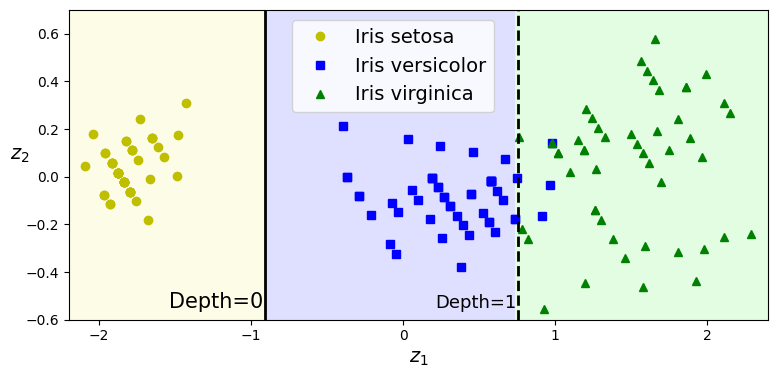

In [29]:
# extra code – this cell generates and saves Figure 6–8

plt.figure(figsize=(8, 4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y_iris == idx],
             X_iris_rotated[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0",
         horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1",
         horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))
save_fig("pca_preprocessing_plot")

plt.show()

# Decision Trees Have a High Variance

In [31]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_iris, y_iris)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",40
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

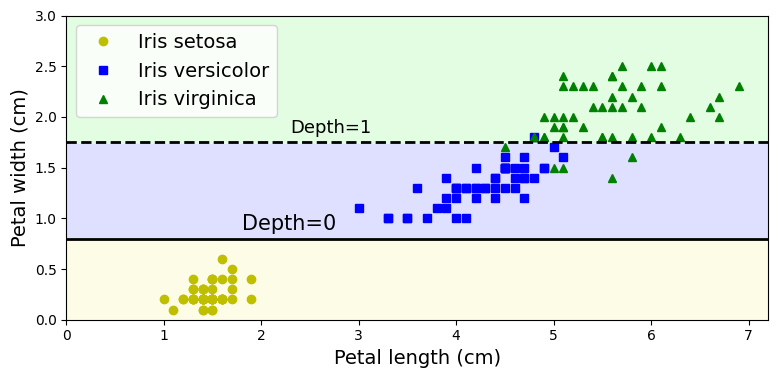

In [32]:
# extra code – this cell generates and saves Figure 6–9

plt.figure(figsize=(8, 4))
y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]
plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)
plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(1.8, th0 + 0.05, "Depth=0", verticalalignment="bottom", fontsize=15)
plt.text(2.3, th1 + 0.05, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()
save_fig("decision_tree_high_variance_plot")

plt.show()

* The main drawback of decision trees is **high variance**

* Small changes in:

  * Training data
  * Hyperparameters
    can lead to **very different trees**

* Scikit-Learn’s training algorithm is **stochastic**

  * It randomly selects the subset of features evaluated at each node

* As a result:

  * Training the same tree on the **same data** can produce different models
  * Unless `random_state` is fixed

* Different trees may:

  * Look very different
  * Make different splits
  * Still achieve similar training performance

* High variance hurts **generalization**

* A common solution is to **average predictions from many trees**

* An ensemble of decision trees is called a **random forest**

* Random forests:

  * Significantly **reduce variance**
  * Are among the **most powerful ML models**
  * Provide much better generalization than a single tree


# Extra Material – Accessing the tree structure

In [33]:
tree = tree_clf.tree_
tree   # .tree_ stores the sttructure of the tree

In [34]:
tree.node_count  # returns the number of nodes

5

In [35]:
tree.max_depth

2

In [36]:
tree.max_n_classes

3

In [37]:
tree.n_features

2

In [38]:
tree.n_outputs

1

In [39]:
tree.n_leaves

np.int64(3)

In [40]:
tree.impurity  # all info stored as ndarray

array([0.66666667, 0.        , 0.5       , 0.16803841, 0.04253308])

The root node is at index 0. The left and right children nodes of node i are tree.children_left[i] and tree.children_right[i]. For example, the children of the root node are:

In [41]:
tree.children_left[0], tree.children_right[0]

(np.int64(1), np.int64(2))

In [42]:
# When the left and right nodes are equal, it means this is a leaf node (and the children node ids are arbitrary):

In [43]:
tree.children_left[3], tree.children_right[3]

(np.int64(-1), np.int64(-1))

In [44]:
is_leaf = (tree.children_left == tree.children_right)
np.arange(tree.node_count)[is_leaf]   #way to leaf node ids

array([1, 3, 4])

In [45]:
# Non-leaf nodes are called split nodes. The feature they split is available via the feature array. Values for leaf nodes should be ignored:

In [46]:
tree.feature

array([ 0, -2,  1, -2, -2])

In [47]:
tree.threshold

array([ 2.44999999, -2.        ,  1.75      , -2.        , -2.        ])

In [48]:
# And the number of instances per class that reached each node is available too:

In [49]:
tree.value

array([[[0.33333333, 0.33333333, 0.33333333]],

       [[1.        , 0.        , 0.        ]],

       [[0.        , 0.5       , 0.5       ]],

       [[0.        , 0.90740741, 0.09259259]],

       [[0.        , 0.02173913, 0.97826087]]])

In [50]:
tree.n_node_samples

array([150,  50, 100,  54,  46])

In [51]:
np.all(tree.value.sum(axis=(1, 2)) == tree.n_node_samples)

np.False_

In [52]:
# Here's how you can compute the depth of each node:

In [53]:
def compute_depth(tree_clf):
    tree = tree_clf.tree_
    depth = np.zeros(tree.node_count)
    stack = [(0, 0)]
    while stack:
        node, node_depth = stack.pop()
        depth[node] = node_depth
        if tree.children_left[node] != tree.children_right[node]:
            stack.append((tree.children_left[node], node_depth + 1))
            stack.append((tree.children_right[node], node_depth + 1))
    return depth

depth = compute_depth(tree_clf)
depth

array([0., 1., 1., 2., 2.])

In [54]:
# Here's how to get the thresholds of all split nodes at depth 1:

In [55]:
tree_clf.tree_.feature[(depth == 1) & (~is_leaf)]

array([1])

In [56]:
tree_clf.tree_.threshold[(depth == 1) & (~is_leaf)]

array([1.75])

# Exercise

## 1. What is the approximate depth of a decision tree trained (without restrictions) on a training set with one million instances?

The depth of a well-balanced binary tree containing _m_ leaves is equal to log₂(_m_), rounded up. log₂ is the binary log; log₂(_m_) = log(_m_) / log(2). A binary Decision Tree (one that makes only binary decisions, as is the case with all trees in Scikit-Learn) will end up more or less well balanced at the end of training, with one leaf per training instance if it is trained without restrictions. Thus, if the training set contains one million instances, the Decision Tree will have a depth of log₂(10<sup>6</sup>) ≈ 20 (actually a bit more since the tree will generally not be perfectly well balanced).

## 2. Is a node’s Gini impurity generally lower or higher than its parent’s? Is it generally lower/higher, or always lower/higher?

A node's Gini impurity is generally lower than its parent's. This is due to the CART training algorithm's cost function, which splits each node in a way that minimizes the weighted sum of its children's Gini impurities. However, it is possible for a node to have a higher Gini impurity than its parent, as long as this increase is more than compensated for by a decrease in the other child's impurity. For example, consider a node containing four instances of class A and one of class B. Its Gini impurity is 1 – (1/5)² – (4/5)² = 0.32. Now suppose the dataset is one-dimensional and the instances are lined up in the following order: A, B, A, A, A. You can verify that the algorithm will split this node after the second instance, producing one child node with instances A, B, and the other child node with instances A, A, A. The first child node's Gini impurity is 1 – (1/2)² – (1/2)² = 0.5, which is higher than its parent's. This is compensated for by the fact that the other node is pure, so its overall weighted Gini impurity is 2/5 × 0.5 + 3/5 × 0 = 0.2, which is lower than the parent's Gini impurity.

## 3. If a decision tree is overfitting the training set, is it a good idea to try decreasing max_depth?

If a Decision Tree is overfitting the training set, it may be a good idea to decrease `max_depth`, since this will constrain the model, regularizing it.

## 4. If a decision tree is underfitting the training set, is it a good idea to try scaling the input features?

Decision Trees don't care whether or not the training data is scaled or centered; that's one of the nice things about them. So if a Decision Tree underfits the training set, scaling the input features will just be a waste of time.

## 5. If it takes one hour to train a decision tree on a training set containing one million instances, roughly how much time will it take to train another decision tree on a training set containing ten million instances? Hint: consider the CART algorithm’s computational complexity

The computational complexity of training a Decision Tree is _O_(_n_ × _m_ log₂(_m_)). So if you multiply the training set size by 10, the training time will be multiplied by _K_ = (_n_ × 10 _m_ × log₂(10 _m_)) / (_n_ × _m_ × log₂(_m_)) = 10 × log₂(10 _m_) / log₂(_m_). If _m_ = 10<sup>6</sup>, then _K_ ≈ 11.7, so you can expect the training time to be roughly 11.7 hours.

## 6. If it takes one hour to train a decision tree on a given training set, roughly how much time will it take if you double the number of features?

If the number of features doubles, then the training time will also roughly double.

## 7. Train and fine-tune a decision tree for the moons dataset by following these steps:
1. Use make_moons(n_samples=10000, noise=0.4) to generate a
moons dataset.
2. Use train_test_split() to split the dataset into a training set and a test
set.
3. Use grid search with cross-validation (with the help of the
GridSearchCV class) to find good hyperparameter values for a
DecisionTreeClassifier. Hint: try various values for
max_leaf_nodes.
4. Train it on the full training set using these hyperparameters, and
measure your model’s performance on the test set. You should get
roughly 85% to 87% accuracy.

In [58]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons,
                                                    test_size=0.2,
                                                    random_state=42)

In [60]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params,
                              cv=3)

grid_search_cv.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [1, 2, ...], 'max_leaf_nodes': [2, 3, ...], 'min_samples_split': [2, 3, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 :

In [61]:
grid_search_cv.best_estimator_

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",17
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node

By default, GridSearchCV trains the best model found on the whole training set (you can change this by setting refit=False), so we don't need to do it again. We can simply evaluate the model's accuracy:

In [62]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8595

## 8. Grow a forest by following these steps:
1. **Continuing the previous exercise, generate 1,000 subsets of the
training set, each containing 100 instances selected randomly. Hint:
you can use Scikit-Learn’s ShuffleSplit class for this.**
2. **Train one decision tree on each subset, using the best
hyperparameter values found in the previous exercise. Evaluate
these 1,000 decision trees on the test set. Since they were trained on
smaller sets, these decision trees will likely perform worse than the
first decision tree, achieving only about 80% accuracy.**
3. **Now comes the magic. For each test set instance, generate the
predictions of the 1,000 decision trees, and keep only the most
frequent prediction (you can use SciPy’s mode() function for this).
This approach gives you majority-vote predictions over the test set.**
4. **Evaluate these predictions on the test set: you should obtain a
slightly higher accuracy than your first model (about 0.5 to 1.5%
higher). Congratulations, you have trained a random forest
classifier!**

In [63]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances,
                  random_state=42)

for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [65]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

np.float64(0.8056605)

In [66]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [67]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [68]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.873